In [1]:
import networkx as nx
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
MAX_SIZE = 200

instances = list(map(read_metis_graph, Path("../data/bio").glob("*.metis")))
graphs = [G for (G, S) in instances if len(G) <= MAX_SIZE]

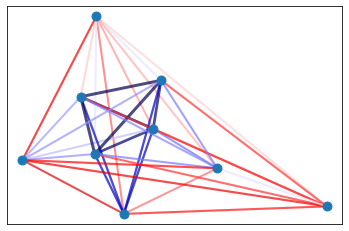

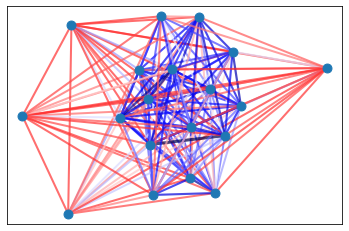

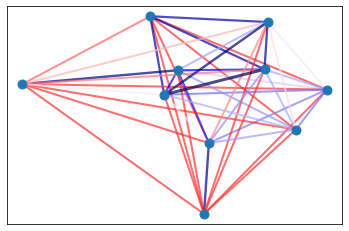

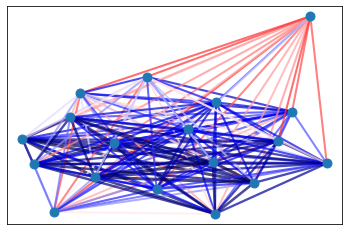

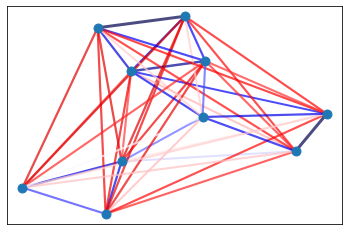

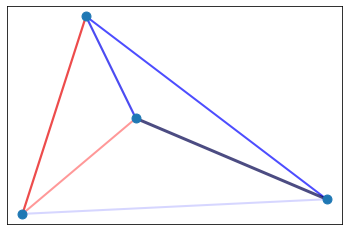

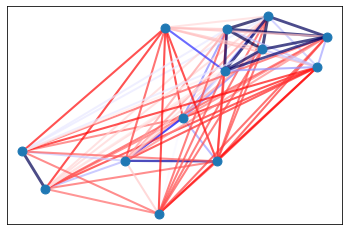

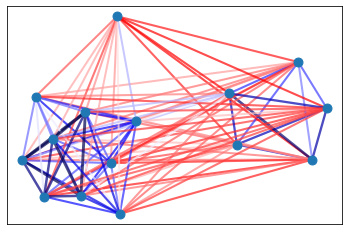

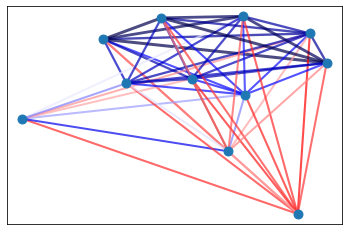

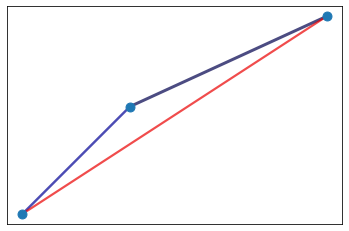

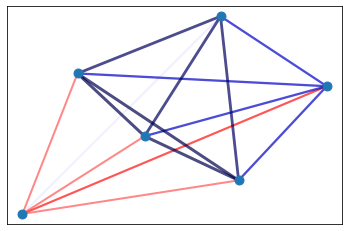

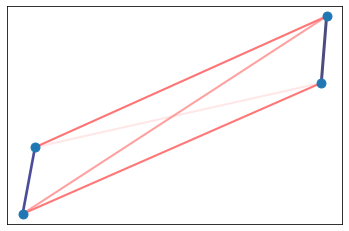

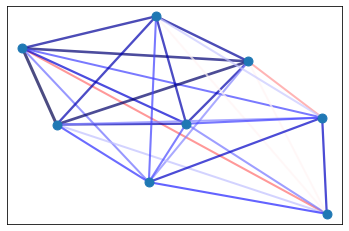

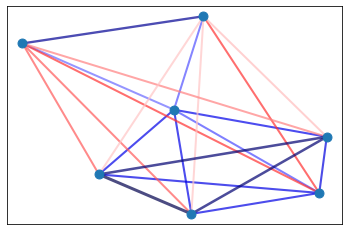

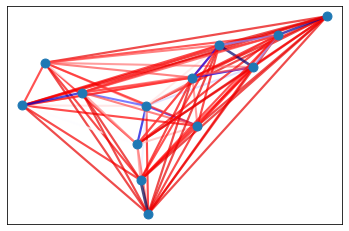

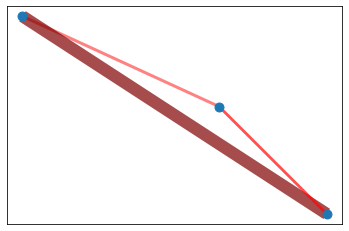

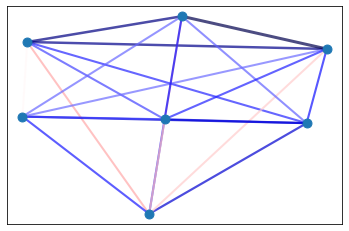

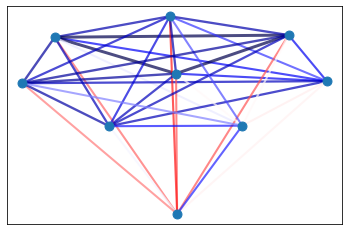

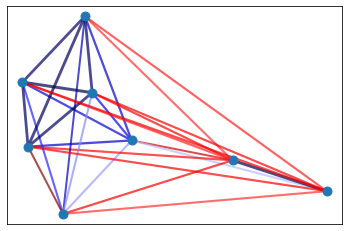

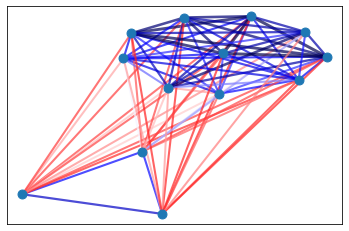

In [15]:
def draw_graph(S):
    K = nx.Graph(S)

    weights = np.array([S[u, v] for (u, v) in K.edges()])
    edges = np.array([(u, v) for (u, v) in K.edges()])
    
    max_abs = max([weights.min(), weights.max()])
    
    G_pos = nx.Graph()
    G_pos.add_edges_from(list(edges[weights > 0]))
    pos = nx.nx_pydot.graphviz_layout(G_pos)

    nx.draw_networkx_nodes(K, pos, node_size=80)
        
    width = 2 + np.abs(weights) / max_abs
    # edge_color = np.sign(weights) * (2 + np.abs(weights))
    edge_color = np.sign(weights) * np.log(np.abs(weights))
    

    nx.draw_networkx_edges(K, pos, list(edges), width=width,
                           edge_color=edge_color, edge_cmap=plt.cm.seismic_r,
                           edge_vmin=-np.abs(edge_color).max(), edge_vmax=np.abs(edge_color).max(), alpha=0.7)
    
    plt.show()


for S in [S for (G, S) in instances if S.shape[0] < 20][:20]:
    draw_graph(S)

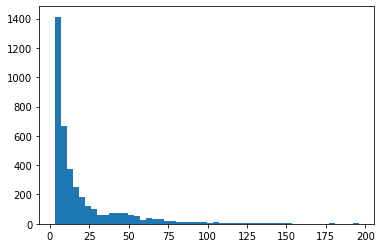

In [10]:
fig, ax = plt.subplots()
ax.hist([graph.order() for graph in graphs], bins=50)
plt.show()

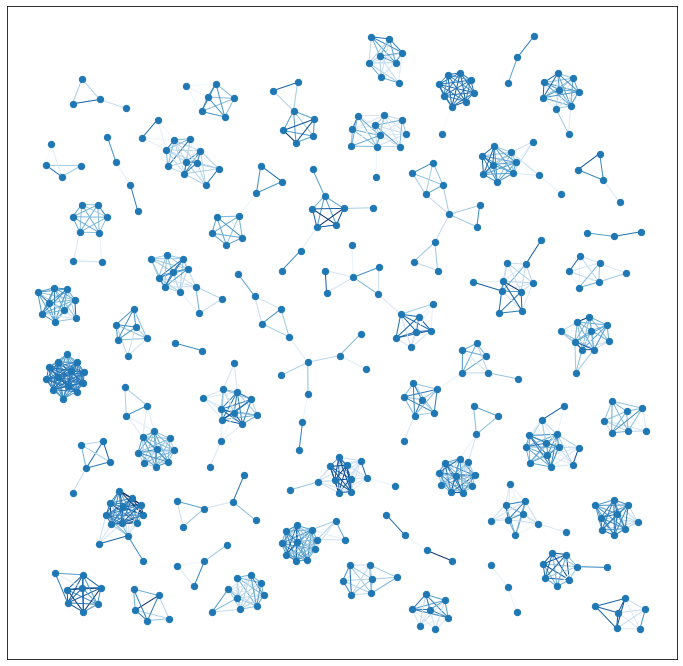

In [11]:
UU = nx.disjoint_union_all([G for G in graphs if len(G) < 15][:50])


fig, ax = plt.subplots(figsize=(12, 12))

# ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’
pos = nx.nx_pydot.graphviz_layout(UU, prog="neato")

edge_color = [c for (u, v, c) in UU.edges.data('cost')]
edge_color = np.log1p(np.array(edge_color))

nx.draw_networkx_nodes(UU, pos, ax=ax, node_size=40)
nx.draw_networkx_edges(UU, pos, ax=ax, edge_color=edge_color, edge_cmap=plt.cm.Blues)

plt.show()

In [ ]:
# baumweite, complexity, durchmesser, dichte

In [ ]:

plt.scatter(number_of_nodes, diameter, alpha=0.7)
plt.show()

In [ ]:
plt.hist([nx.sigma(G) for G in graphs])
plt.show()